#Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm import tqdm_notebook


In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

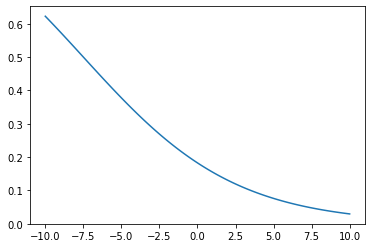

In [4]:
w= -0.2     #@param {type: "slider", min: -2, max: 2,step: 0.1}
b = -1.5     #@param {type: "slider", min: -2, max: 2,step: 0.1} 
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

In [5]:
type(Y)

numpy.ndarray

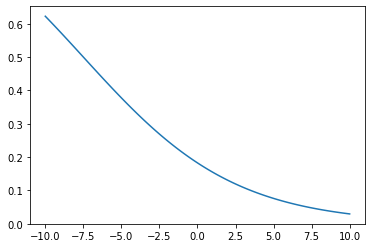

In [6]:
plt.plot(X,Y)
plt.show()

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [8]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [10]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)                                                                                          

XX1,XX2 = np.meshgrid(X1, X2)

print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [11]:
type(XX1)

numpy.ndarray

In [12]:
type(XX2)

numpy.ndarray

In [0]:
w1 = 0.5
w2 = 0.5
b = 0

Y = sigmoid_2d(XX1,XX2,w1,w2,b)
#print(Y)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

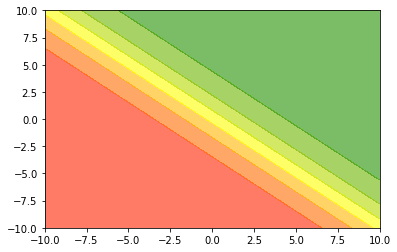

In [15]:
#https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6 )  #contourf not contour
plt.show()

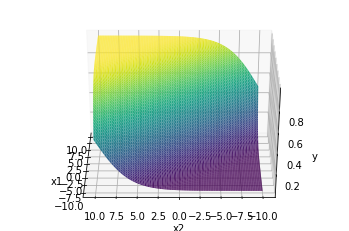

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

ax.view_init(30,180)



#Compute Loss for Given Dataset 

In [0]:
#given input and output, identify different params, then identify the params (optimal)
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25)*20 -10  #random generates numbers between -1 and 1 
Y = sigmoid(X,w_unknown,b_unknown)          

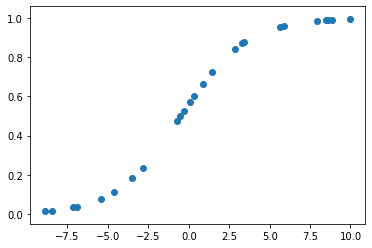

In [18]:
plt.scatter(X,Y)
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss +=  (y-sigmoid(x,w_est,b_est))**2
  return loss  

In [0]:
W = np.linspace(0,2,101)
B =  np.linspace(-1,1,101)

WW,BB  =  np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [21]:
WW.shape

(101, 101)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])


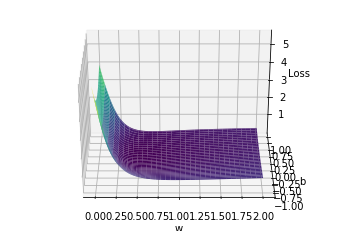

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss,cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

ax.view_init(30,270)

In [0]:
ij = np.argmin(Loss)  #coordinate of number which is minimum in list
i = int(np.floor(ij/Loss.shape[1])) 
j = ij - i*Loss.shape[1]  

In [25]:
print(i,j)

63 25


In [26]:
print(WW[i,j],BB[i,j])

0.5 0.26


#Class for Sigmoid neuron

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w =None
    self.b = None
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))  
    return (y_pred-y)*y_pred*(1-y_pred)*x
  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))  
    return (y_pred-y)*y_pred*(1-y_pred)

  def fit(self, X, Y, epochs =1, learning_rate=1, initialise = True, display_loss = False):
    #initialize w,b
    if initialise:
      self.w = np.random.randn(1,X.shape[1])
      self.b=0
    if display_loss:
      loss = []

    for i in tqdm_notebook(range(epochs),total =epochs,unit = "epoch"):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)

      self.w -= learning_rate *dw 
      self.b -= learning_rate *db    

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y_pred,Y))
    
    #print("\nhahahahaha ", type(loss.values()))
    #loss plot 
    
    if display_loss:
      plt.plot(loss) # just loss.values() not working
      plt.xlabel('Epochs')
      plt.ylabel('Mean_Squared_Error')
      plt.show()    
  
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)  

# Fit for ToyData

In [28]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]]) 
Y= [1,1,1,0,0,0]
print(X.shape[1])

2


In [0]:
sn = SigmoidNeuron()

In [30]:
sn.fit(X,Y,1,0.25,True)
print(sn.w,sn.b)

[[1.13078818 0.71668025]] [0.01798465]


In [0]:
def plot_sn(X,Y,sn,ax): #sn is sn learnt so far
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1,XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)

  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j]=sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap = my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()    

[[-0.25427194 -0.76706088]] [0.00288725]
[[-0.25427194 -0.76706088]] [0.00288725]
[[ 0.29501228 -0.78359266]] [0.03572646]
[[ 0.57740457 -0.51036311]] [0.07205715]
[[ 0.86901909 -0.13534951]] [0.04599024]
[[ 0.88398094 -0.43366137]] [-0.02424445]
[[ 1.05093936 -0.2317981 ]] [-0.07764557]
[[ 1.05844573 -0.4496559 ]] [-0.139483]
[[ 1.17594515 -0.31956871]] [-0.18504845]
[[ 1.19508124 -0.44399865]] [-0.23376458]
[[ 1.26850922 -0.39294821]] [-0.27162585]
[[ 1.30074664 -0.44339893]] [-0.30922795]
[[ 1.34774057 -0.43986071]] [-0.34165984]
[[ 1.38346718 -0.45847142]] [-0.37233552]
[[ 1.41952049 -0.46782073]] [-0.40039684]
[[ 1.4523728  -0.47894316]] [-0.426563]
[[ 1.48339619 -0.48881527]] [-0.45093771]
[[ 1.51256764 -0.49821176]] [-0.47374665]
[[ 1.54012156 -0.50707334]] [-0.49515231]
[[ 1.56621619 -0.51546736]] [-0.5152995]
[[ 1.59099255 -0.52343792]] [-0.53431271]


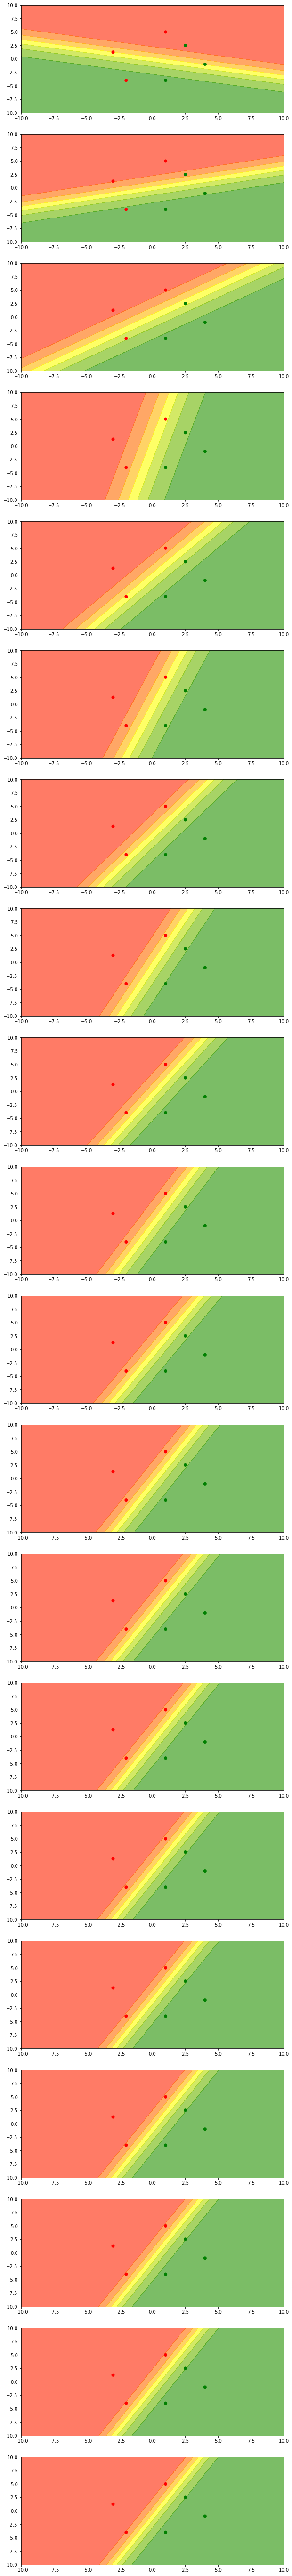

In [32]:

sn.fit(X,Y,1,0.05,True)
N=20
plt.figure(figsize=(10,N*5))
print(sn.w,sn.b)
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)  #we would like to separate plots into individual sub-plots. Can use sub-plots. Have to pass handler instead of plt
  sn.fit(X,Y,1,0.5,False)  #because learning rates are larger, changes are coming much faster

  #Exercise: Do an animation using the html... 

#Load Data

In [33]:
!ls

melb_data.csv  mobile_cleaned.csv  sample_data


In [0]:
data =pd.read_csv('mobile_cleaned.csv')

In [35]:
data.head()

,PhoneId,RAM,Height,Screen to Body Ratio (calculated),Internal Memory,Screen Size,Weight,Resolution,Capacity,Pixel Density,Processor_frequency,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,...,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,4,157.9,80.68,64,6.26,182,20,4000,403,1.8,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.5
1,1,3,156.2,80.85,32,6.20,168,8,4230,271,1.8,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.5
2,2,3,157.0,83.68,32,6.30,168,25,3500,409,2.1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.4
3,4,4,159.8,74.78,64,6.00,169,24,3300,411,2.2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,4.3
4,5,4,160.4,84.23,64,6.50,175,16,3750,396,2.2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.4


In [36]:
data.shape

(341, 88)

In [0]:
X =data.drop('Rating',axis=1)

In [0]:
Y = data['Rating'].values

In [0]:
#Y.head()

In [0]:
threshold = 4.2
data['Class'] = (data['Rating']>=threshold).astype(np.int)

In [42]:
data['Class']  #will contain 1s and 0s instead of true and False

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    0
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [43]:
data['Class'].value_counts(normalize =True) #skewed dataset, many more 1s than 0s

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised =data['Class'].values

##Standardization

In [0]:
#Each columns has 0 mean and std 1

In [46]:
print(Y)

[4.5 4.5 4.4 4.3 4.4 4.5 4.3 4.1 4.3 4.5 4.5 4.  4.4 4.4 4.4 4.4 4.5 4.4
 4.4 4.4 4.4 4.5 4.4 4.3 4.2 4.3 4.3 4.6 4.4 4.5 3.9 4.2 4.3 4.2 4.3 4.3
 4.2 4.4 4.1 3.8 4.4 4.6 4.3 4.5 4.5 4.2 3.9 4.3 4.  4.3 4.3 3.9 4.2 4.5
 4.  4.6 4.2 2.8 4.4 4.3 4.2 4.4 4.4 4.  4.4 4.4 4.1 4.5 4.3 3.9 4.3 4.1
 4.1 4.2 3.4 4.2 4.6 3.8 4.3 4.5 4.2 4.5 4.5 4.  4.1 4.4 4.5 4.1 4.5 4.3
 4.5 3.9 3.9 4.4 4.4 4.4 4.  4.1 4.1 4.4 4.3 4.3 4.2 4.3 3.4 4.3 4.3 4.2
 4.6 4.8 4.4 3.4 3.7 4.2 4.3 4.4 4.3 4.2 4.1 4.3 4.  3.9 4.4 4.4 3.9 3.1
 3.7 4.2 4.4 4.  4.  4.1 4.2 4.3 4.2 4.3 4.1 3.6 4.1 4.  3.8 3.7 4.3 4.1
 4.1 4.5 4.  4.3 3.6 4.1 4.5 3.5 4.  4.3 4.6 3.5 3.9 4.1 3.9 3.8 4.4 4.3
 4.  3.9 4.4 4.7 3.9 4.5 3.7 4.  4.3 4.1 4.8 4.1 4.  4.7 4.  4.1 4.  3.4
 4.1 3.9 3.1 4.1 3.7 3.4 3.9 4.3 4.1 3.7 3.8 4.  3.8 4.6 3.4 3.3 3.2 3.5
 4.3 4.1 4.  3.8 4.3 4.1 4.  3.8 3.8 3.9 4.1 3.7 4.2 4.  4.2 4.4 4.1 3.4
 4.2 4.4 3.9 3.9 4.4 4.2 4.5 4.5 4.2 4.  4.2 3.5 3.7 4.3 5.  3.5 4.4 3.7
 4.3 3.9 4.3 3.8 3.8 4.3 5.  4.1 3.  4.4 3.  4.  4.

In [0]:
R = np.random.random([100,1])

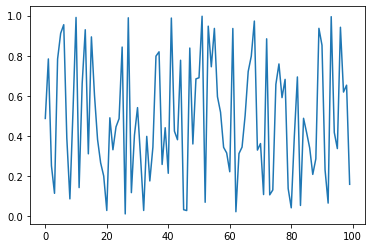

In [48]:
#print(R)
plt.plot(R)
plt.show()

In [49]:
np.mean(R)

0.48466518080862714

In [50]:
np.std(R)

0.3031409948813082

In [0]:
#note: its not a direct appln, have to import AN INStance first
scaler =StandardScaler()

In [52]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
scaler.mean_

array([0.48466518])

In [0]:
RT =scaler.transform(R)

In [55]:
np.mean(RT)
np.std(RT)

1.0

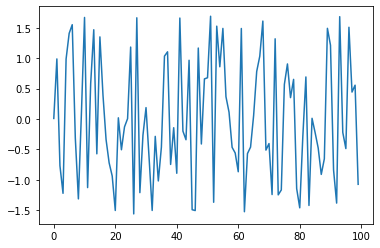

In [56]:
plt.plot(RT)
plt.show()

In [0]:
#should split first and then standardise

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,stratify =Y_binarised )

In [59]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [0]:
#first, fit scaler on X_train and then use these mean and std values to transform X_test
scaler = StandardScaler()

In [0]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
minmax_scaler =MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [64]:
np.max(Y_scaled_train)

1.0

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [66]:
np.min(Y_scaled_test)

0.11999999999999988

In [0]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [68]:
scaled_threshold

0.6800000000000002

In [0]:
Y_binarised_train = (Y_scaled_train>scaled_threshold).astype("int").ravel()

In [70]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [0]:
Y_binarised_test = (Y_scaled_test>scaled_threshold).astype("int").ravel()

#Train on real data

In [0]:
sn = SigmoidNeuron()

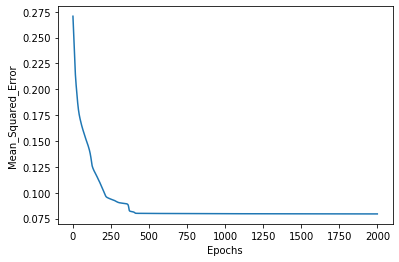

In [150]:
#Loss Plot

sn.fit(X_scaled_train,Y_scaled_train,epochs =2000 , learning_rate=0.015, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test>scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [155]:
print(accuracy_train, accuracy_test)

0.7529411764705882 0.7674418604651163


In [151]:
'''
1) Plot loss plot for different datasets under compute loss section
2) Use different toy POINTS, case when points are NOT linearly separable
3) Try different thresholds
4) Different Hyperparameters
5) Plot Accuracy vs Epochs 
6) Table:  Epochs, Learning Rate, MSE, Accuracy

* What happens when weights are updates after seeing A point instead of all the points(as in an epoch)
This means we will get 6 plots between the 2 consecutive contour plots corresponding to the two epochs
This will give a better intuition on how the decision boundary is learnt wrt each point, that is a red point already 
in the red zone doesnt affect much but the other case affects the decision boundary!  

*Do animation of these contour plots

*In the Loss Vs (W,b)meshgrid plot, indicate the loss value points for each (w,b) set learnt in an epoch.
And using an animation, see how the loss finally plunges into the valley!

My guess: This must be Stochastic gradient Descent 

'''


'\n1) Plot loss plot for different datasets under compute loss section\n2) Use different toy POINTS, case when points are NOT linearly separable\n3) Try different thresholds\n4) Different Hyperparameters\n5) Plot Accuracy vs Epochs \n6) Table:  Epochs, Learning Rate, MSE, Accuracy\n\n* What happens when weights are updates after seeing A point instead of all the points(as in an epoch)\nThis means we will get 6 plots between the 2 consecutive contour plots corresponding to the two epochs\nThis will give a better intuition on how the decision boundary is learnt wrt each point, that is a red point already \nin the red zone doesnt affect much but the other case affects the decision boundary!  \n\n*Do animation of these contour plots\n\n*In the Loss Vs (W,b)meshgrid plot, indicate the loss value points for each (w,b) set learnt in an epoch.\nAnd using an animation, see how the loss finally plunges into the valley!\n\nMy guess: This must be Stochastic gradient Descent \n\n'